In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.collections
import numpy as np

Reading in the godforsaken csvs for the nth time.

In [18]:
points = pd.read_csv(r"D:/!!Research/rgee_test/GEE_LPC/point_data/draft_points.csv")
points.head()


,OBJECTID,GrndTruth,b1_soilWater,b2_soilWater,b3_soilWater,b4_soilWater,b5_soilWater,b6_soilWater,b1_sandCont,b2_sandCont,...,b12_bioclim,b13_bioclim,b14_bioclim,b15_bioclim,b16_bioclim,b17_bioclim,b18_bioclim,b19_bioclim,NEAR_FID,NEAR_DIST
0,1,0,16,16,17,18,18,19,59,59,...,410,63,9,60,183,36,172,37,40333,324.939688
1,2,0,16,16,17,17,18,18,57,57,...,414,63,10,60,184,37,174,38,40338,789.179317
2,3,0,15,14,16,17,17,17,56,55,...,416,63,10,60,184,37,174,38,40342,83.484661
3,4,0,13,12,13,15,15,16,65,63,...,416,63,10,59,183,38,173,38,40825,548.740335
4,5,0,18,18,18,19,19,19,54,55,...,410,63,9,60,183,36,172,37,40333,71.359434


If need to drop columns, this is the format

In [ ]:
#class_df_temp2 = class_df_temp.drop(columns = ['Unnamed: 0', 'level', 'id', 'layer'])
#class_df_temp2.head()


If need to export, this is how

In [ ]:
#class_df_temp2.to_csv('E:/fall23/project/csv_files/class_lvl_metrics.csv')

Creating a corrplots function

In [6]:
# Compute the correlation matrix
def corrfunc(corr, title):

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    fig, ax = plt.subplots()

    # Draw the heatmap with the mask and correct aspect ratio
    vmax = np.abs(corr.values[~mask]).max()
    sns.heatmap(corr, annot=True, mask=mask, cmap=plt.cm.seismic, vmin=-vmax, vmax=vmax,
                square=True, linecolor="white", linewidths=0.5, ax=ax)
    for i in range(len(corr)):
        for j in range(i + 1):
            s = "{:.3f}".format(corr.values[i,j])
            ax.text(j+0.5, (i + 0.5) ,s, 
                ha="center", va="center", color = 'w')
        ax.text(i+0.5, (i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)

    ax.axis("off")
    plt.title(label = title, fontsize = 18)
    plt.show()

#corr_test_title = "corr test"
#corrfunc(corr_test, corr_test_title)

In [20]:
mesq = points.loc[points['GrndTruth'] == 1]
mesq

,OBJECTID,GrndTruth,b1_soilWater,b2_soilWater,b3_soilWater,b4_soilWater,b5_soilWater,b6_soilWater,b1_sandCont,b2_sandCont,...,b12_bioclim,b13_bioclim,b14_bioclim,b15_bioclim,b16_bioclim,b17_bioclim,b18_bioclim,b19_bioclim,NEAR_FID,NEAR_DIST
9,10,1,17,17,17,18,19,19,61,60,...,410,63,9,60,183,36,172,37,47659,699.864493
12,13,1,17,17,18,18,19,20,56,55,...,416,63,10,59,183,38,173,38,47907,172.049731
15,16,1,17,16,17,18,18,19,58,58,...,410,63,10,59,182,37,171,38,51352,123.951480
16,17,1,16,16,16,17,17,17,62,61,...,410,63,10,59,182,37,171,38,40341,130.156336
25,26,1,14,14,15,16,16,17,66,66,...,412,63,10,59,182,37,171,38,32101,895.830360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,979,1,13,13,14,16,16,16,69,69,...,407,71,9,68,195,32,191,32,22397,56.620640
979,980,1,11,11,12,13,14,15,70,69,...,407,71,9,68,195,32,191,32,22398,53.487693
984,985,1,12,12,13,15,16,16,66,65,...,407,71,9,68,195,32,191,32,22520,60.314535
990,991,1,14,13,14,15,15,15,63,62,...,407,71,9,68,195,32,191,32,22391,100.812512


c:\Users\Justin\AppData\Local\r-miniconda\envs\mesq_proj_env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


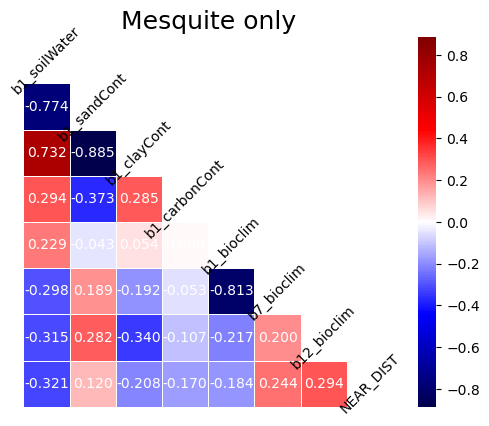

In [21]:
mesq_corr = mesq[['b1_soilWater', 'b1_sandCont', 'b1_clayCont', 'b1_carbonCont', 
'b1_bioclim', 'b7_bioclim', 'b12_bioclim', 'NEAR_DIST']].corr(method = 'pearson')

mesq_title = "Mesquite only"
corrfunc(mesq_corr, mesq_title)

In [22]:
notmesq = points.loc[points['GrndTruth'] == 0]
notmesq

,OBJECTID,GrndTruth,b1_soilWater,b2_soilWater,b3_soilWater,b4_soilWater,b5_soilWater,b6_soilWater,b1_sandCont,b2_sandCont,...,b12_bioclim,b13_bioclim,b14_bioclim,b15_bioclim,b16_bioclim,b17_bioclim,b18_bioclim,b19_bioclim,NEAR_FID,NEAR_DIST
0,1,0,16,16,17,18,18,19,59,59,...,410,63,9,60,183,36,172,37,40333,324.939688
1,2,0,16,16,17,17,18,18,57,57,...,414,63,10,60,184,37,174,38,40338,789.179317
2,3,0,15,14,16,17,17,17,56,55,...,416,63,10,60,184,37,174,38,40342,83.484661
3,4,0,13,12,13,15,15,16,65,63,...,416,63,10,59,183,38,173,38,40825,548.740335
4,5,0,18,18,18,19,19,19,54,55,...,410,63,9,60,183,36,172,37,40333,71.359434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,13,13,14,16,16,16,64,62,...,411,71,9,66,196,32,192,32,22319,12.992623
996,997,0,13,13,14,15,16,16,62,60,...,407,71,9,68,195,32,191,32,22392,57.883199
997,998,0,15,15,15,16,16,17,58,57,...,409,71,9,66,196,32,191,32,22521,184.121274
998,999,0,11,11,12,13,14,14,65,63,...,410,71,9,66,196,32,192,32,22532,14.785844


c:\Users\Justin\AppData\Local\r-miniconda\envs\mesq_proj_env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


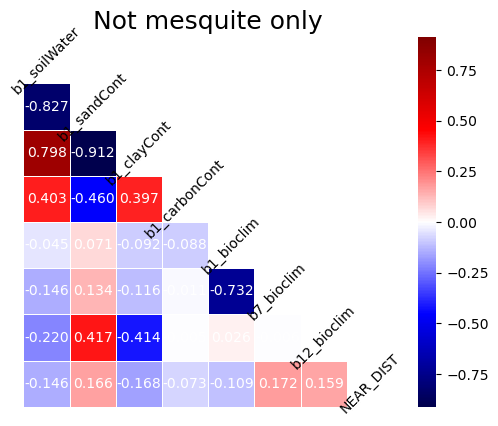

In [23]:
notmesq_corr = notmesq[['b1_soilWater', 'b1_sandCont', 'b1_clayCont', 'b1_carbonCont', 
'b1_bioclim', 'b7_bioclim', 'b12_bioclim', 'NEAR_DIST']].corr(method = 'pearson')

notmesq_title = "Not mesquite only"
corrfunc(notmesq_corr, notmesq_title)

Creating a function that allows for the generation of 3D scatterplots from a given dataframe

In [118]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

def scatter_3d(given_df, given_title):

    z = given_df['enn']
    x = given_df['pd']
    y = given_df['area_mn']

    fig = plt.figure(figsize= (10, 6))
    ax = fig.add_subplot(projection='3d', facecolor = 'white')

    ax.grid(b = True, color = 'grey', linestyle = '-.', linewidth = 0.3, alpha = 0.2)

    my_cmap = plt.colormaps['gist_ncar']

    sctt = ax.scatter3D(x, y, z, alpha = 1,
                    c = given_df['raster'],
                    cmap = my_cmap,
                    marker = 'o',
                    s = 50)
    
    axis_label = {'color': 'black',
                  'size' : 10}

    ax.set_xlabel('Patches per 100 hectares', fontdict = axis_label)
    ax.set_ylabel('Patch area (hectares)', fontdict = axis_label)
    ax.set_zlabel('Nearest neighbor distance (meters)', fontdict = axis_label)

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')

    cbar = fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5, ticks = given_df['raster'])
    cbar.set_label('Buffer')

    ax.view_init(elev=30, azim=70, roll=0) #70 or 140 works well for azim or 140
    
    title_dict = {'size': 12}
    ax.text2D(0.1, 0.95, given_title, transform=ax.transAxes, fontdict = title_dict, wrap = True)
    #plt.title(given_title, fontdict = title_label, wrap = True)
    plt.show()


Grass

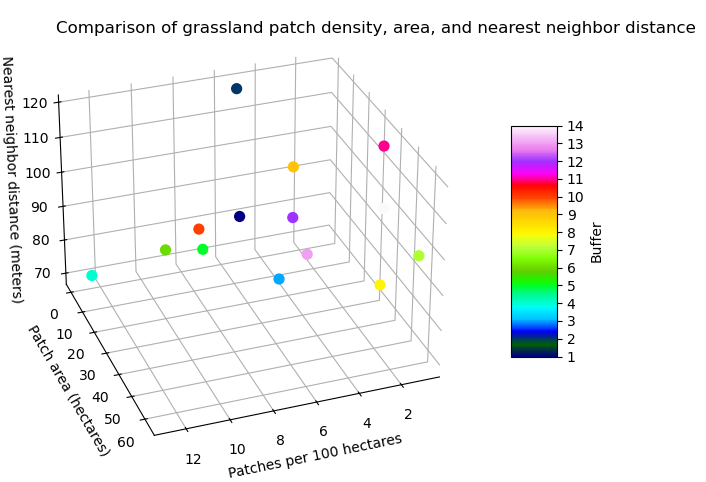

In [119]:
sc3title_grass = "Comparison of grassland patch density, area, and nearest neighbor distance"
scatter_3d(grass, sc3title_grass)

In [155]:
def scatter_3d_edge(given_df, given_title):

    z = given_df['pd']
    x = given_df['te']
    y = given_df['pland']

    fig = plt.figure(figsize= (10, 6))
    ax = fig.add_subplot(projection='3d', facecolor = 'white')

    ax.grid(b = True, color = 'grey', linestyle = '-.', linewidth = 0.3, alpha = 0.2)

    my_cmap = plt.colormaps['viridis']

    sctt = ax.scatter3D(x, y, z, alpha = 1,
                    c = given_df['area_mn'],
                    cmap = my_cmap,
                    marker = 'o',
                    s = (given_df['area_mn'] * 10))
    
    axis_label = {'color': 'black',
                  'size' : 10}

    ax.set_xlabel('Total edge (meters)', fontdict = axis_label)
    ax.set_ylabel('Percent of buffer', fontdict = axis_label)
    ax.set_zlabel('Patches per 100 hectares', fontdict = axis_label)

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')

    cbar = fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) #, ticks = given_df['enn']
    cbar.set_label('Patch area (hectares)')

    ax.view_init(elev=30, azim=70, roll=0) #70 or 140 works well for azim or 140
    
    title_dict = {'size': 12}
    ax.text2D(0.1, 0.95, given_title, transform=ax.transAxes, fontdict = title_dict, wrap = True)
    #plt.title(given_title, fontdict = title_label, wrap = True)
    plt.show()

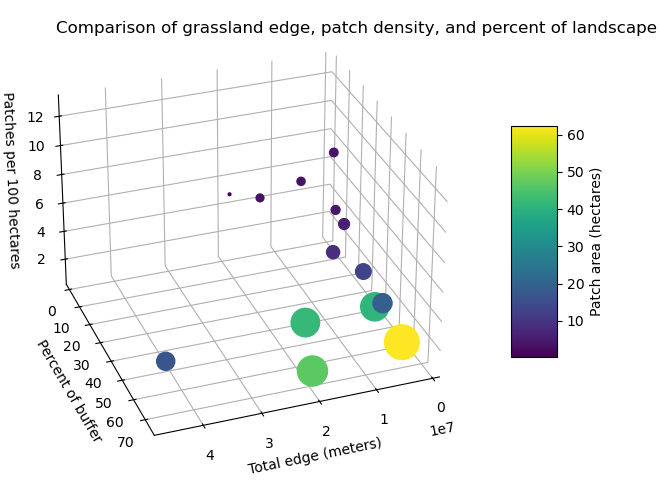

In [156]:
scatter_3d_edge(grass, given_title="Comparison of grassland edge, patch density, and percent of landscape")

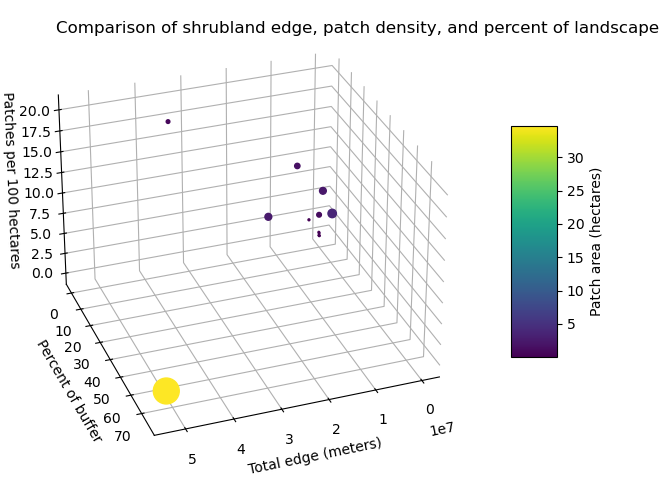

In [157]:
scatter_3d_edge(shrub, given_title="Comparison of shrubland edge, patch density, and percent of landscape")

In [223]:
def scatter_3d_edge_exp(given_df, given_title):

    z = given_df['pd']
    x = given_df['te']
    y = given_df['pland']

    fig = plt.figure(figsize= (10, 6))
    ax = fig.add_subplot(projection='3d', facecolor = 'white')

    ax.grid(b = True, color = 'grey', linestyle = '-.', linewidth = 0.3, alpha = 0.2)

    my_cmap = plt.colormaps['viridis']

    sctt = ax.scatter3D(x, y, z, alpha = 1,
                    c = given_df['area_mn'],
                    cmap = my_cmap,
                    marker = 'o',
                    s = (((given_df['pd']/given_df['pland']) * given_df['pd'] * 25) + 100))
    
    axis_label = {'color': 'black',
                  'size' : 10}

    ax.set_xlabel('Total edge (meters)', fontdict = axis_label)
    ax.set_ylabel('Percent of buffer', fontdict = axis_label)
    ax.set_zlabel('Patches per 100 hectares', fontdict = axis_label)

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')

    cbar = fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) #, ticks = given_df['enn']
    cbar.set_label('Patch area (hectares)')

    ax.view_init(elev=30, azim=70, roll=0) #70 or 140 works well for azim or 140
    
    title_dict = {'size': 12}
    ax.text2D(0.1, 0.95, given_title, transform=ax.transAxes, fontdict = title_dict, wrap = True)
    #plt.title(given_title, fontdict = title_label, wrap = True)
    plt.show()